In [1]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import networkx as nx
import seaborn as sns
from sklearn import manifold
from sklearn.metrics import euclidean_distances
%matplotlib inline

In [178]:
# load file
x = genfromtxt('1_Africa_data.txt', delimiter=" ")
y = pd.read_table('1_Africa_index.txt', header=None)

In [186]:
# assign people from different regions
Region = (y[4])
print (np.unique(Region))

['Bantu_N.E.' 'Bantu_S.E._Pedi' 'Bantu_S.E._S.Sotho' 'Bantu_S.E._Tswana'
 'Bantu_S.E._Zulu' 'Bantu_S.W._Herero' 'Bantu_S.W._Ovambo' 'Biaka_Pygmies'
 'Mandenka' 'Mbuti_Pygmies' 'San' 'Yoruba']


In [180]:
# 2-dimensional PCA
n_components = 2

pca = PCA(n_components=n_components)
x_pca = pca.fit_transform(x)

pc1_r=str(float(pca.explained_variance_ratio_[0])* 100)[:4] + '%'
pc2_r=str(float(pca.explained_variance_ratio_[1])* 100)[:4] + '%'

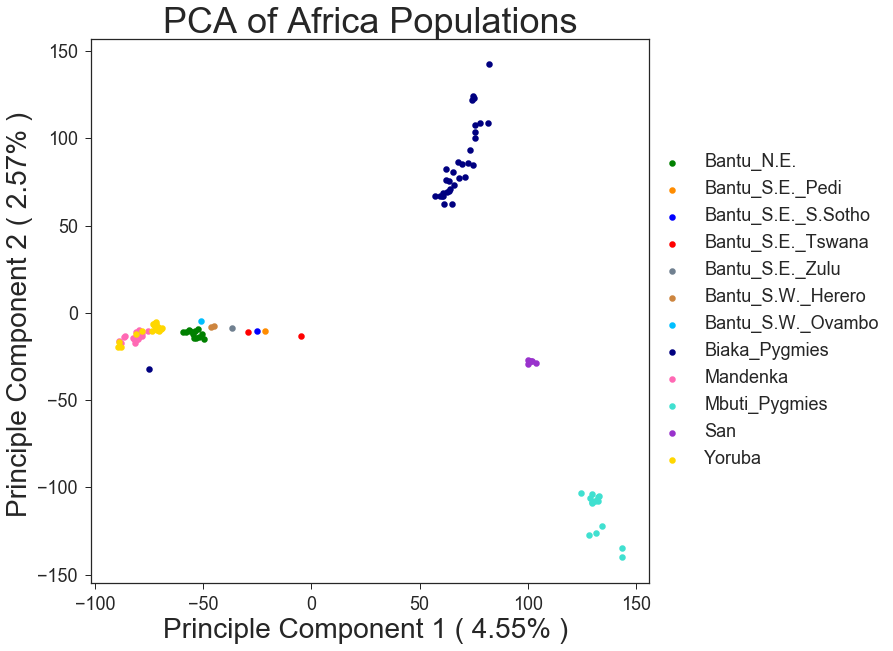

In [188]:
# for population 1_Africa
region_names = ['Bantu_N.E.', 'Bantu_S.E._Pedi', 'Bantu_S.E._S.Sotho', 'Bantu_S.E._Tswana', 'Bantu_S.E._Zulu', 'Bantu_S.W._Herero', 'Bantu_S.W._Ovambo', 'Biaka_Pygmies', 'Mandenka', 'Mbuti_Pygmies', 'San', 'Yoruba']
colors = ['green','darkorange','blue','red','slategray','peru','deepskyblue','navy','hotpink','turquoise','darkorchid','gold']

# for population 1_Africa simplified (use country as labels)
#Region = (y[5])
#region_names = ['Central_African_Republic', 'Democratic_Republic_of_Congo', 'Kenya', 'Namibia', 'Nigeria', 'Senegal', 'South_Africa']
#colors = ['navy', 'turquoise', 'darkorange','darkorchid','gold', 'hotpink','deepskyblue']

# for population 2_America
#region_names = ['Colombians', 'Karitiana', 'Maya', 'Pima', 'Surui']
#colors = ['navy' , 'turquoise', 'darkorange', 'gold', 'hotpink']

# for population 3_CentralSouthAsia
#region_names = ['Balochi', 'Brahui', 'Burusho', 'Hazara', 'Kalash', 'Makrani', 'Pathan', 'Sindhi', 'Uygur']
#colors = ['navy', 'turquoise', 'darkorange','red','gold', 'hotpink','green','darkorchid', 'blue']

# for population 4_EstAisa
#region_names = ['Cambodians', 'Dai', 'Daur', 'Han', 'Han_N', 'Hezhen', 'Japanese', 'Lahu', 'Miaozu', 'Mongola', 'Naxi', 'Oroqen', 'She', 'Tu', 'Tujia', 'Xibo', 'Yakut', 'Yizu']
#colors = ['navy', 'turquoise', 'darkorange','red','gold', 'hotpink','green','darkorchid', 'blue', 'peru','deepskyblue','slategray','maroon','y','lime','darksalmon','olivedrab','teal']

# for population 4_EstAisa simplified (use country as labels)
#Region = (y[5])
#region_names = ['Cambodia', 'China', 'Japan', 'Siberia']
#colors = ['navy', 'hotpink', 'deepskyblue','gold']

# for population 5_Europe
#region_names =['Adygei', 'French', 'French_Basque', 'North_Italian', 'Orcadian', 'Russian', 'Sardinian', 'Tuscan']
#colors = ['navy', 'turquoise', 'darkorange','red','gold', 'hotpink','green','darkorchid']

# for population 6_MiddleEst
#region_names = ['Bedouin', 'Druze', 'Mozabite', 'Palestinian']
#colors = ['navy', 'turquoise', 'gold', 'hotpink']

# for population 7_Oceania
#region_names = ['NAN_Melanesian', 'Papuan']
#colors = ['turquoise', 'hotpink']

# plot graph
x_transformed = x_pca
title = "PCA of Africa Populations"

plt.figure(figsize=(10, 10))
for color, region_name in zip(colors, region_names):
    plt.scatter(x_transformed[ (Region == region_name) , 0], x_transformed[(Region == region_name) , 1], s=20, color=color, lw=2, label=region_name)
    plt.title(title, fontsize=36)
    plt.legend(loc='center left', bbox_to_anchor=(0.98, 0.5), shadow=False, scatterpoints=1, fontsize=18)
    plt.xlabel('Principle Component 1 ( %s ) '%(pc1_r), fontsize=28)
    plt.ylabel('Principle Component 2 ( %s ) '%(pc2_r), fontsize=28)
    plt.tick_params(labelsize=18)
plt.show()

In [75]:
# define function for calculating genetic distance
def dist_numpy(ind1, ind2):
    """
    Use vectorized numpy ops to compute d(i,j) 
    between two sample genotype vectors
    """
    numerator = float(np.sum(np.square(ind1-ind2)))
    return numerator / float(488919)

In [189]:
# calculate pairwise genetic distance of all samples
n = x.shape[0]
d = np.zeros(shape=(n,n))

for i in range(n-1):
    for j in range(i+1,n):
        d[i,j] = dist_numpy(x[i,:], x[j,:])
        
print (d)

[[ 0.          0.59290394  0.59097724 ...,  0.59951853  0.59695369
   0.59578785]
 [ 0.          0.          0.59679415 ...,  0.59921991  0.5944543
   0.59690869]
 [ 0.          0.          0.         ...,  0.59729321  0.59854904
   0.59993987]
 ..., 
 [ 0.          0.          0.         ...,  0.          0.58581892
   0.58573302]
 [ 0.          0.          0.         ...,  0.          0.          0.58972959]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]]


In [190]:
# How many clusters can be found from the population, with different cut-off for genetic distance
cut = []
ncc_list = []
n = x.shape[0]
n_list=list(range(n))

for d_cutoff in range(1000,0,-1):
    d_cutoff = d_cutoff / 1000.00
    print (d_cutoff)
    G = nx.Graph()
    G.add_nodes_from(n_list)
    for i in range(n-1):
        for j in range(i+1,n):
            if d[i,j] < d_cutoff:
                G.add_edge(i,j)
    Gcc=nx.connected_component_subgraphs(G)
    ncc = 0
    for gi in Gcc:
        #if len(gi.node) >= 5:  # set cut-off of smallest number of individuals present in one cluster
        ncc += 1            
    cut.append(d_cutoff)
    ncc_list.append(ncc)

1.0
0.999
0.998
0.997
0.996
0.995
0.994
0.993
0.992
0.991
0.99
0.989
0.988
0.987
0.986
0.985
0.984
0.983
0.982
0.981
0.98
0.979
0.978
0.977
0.976
0.975
0.974
0.973
0.972
0.971
0.97
0.969
0.968
0.967
0.966
0.965
0.964
0.963
0.962
0.961
0.96
0.959
0.958
0.957
0.956
0.955
0.954
0.953
0.952
0.951
0.95
0.949
0.948
0.947
0.946
0.945
0.944
0.943
0.942
0.941
0.94
0.939
0.938
0.937
0.936
0.935
0.934
0.933
0.932
0.931
0.93
0.929
0.928
0.927
0.926
0.925
0.924
0.923
0.922
0.921
0.92
0.919
0.918
0.917
0.916
0.915
0.914
0.913
0.912
0.911
0.91
0.909
0.908
0.907
0.906
0.905
0.904
0.903
0.902
0.901
0.9
0.899
0.898
0.897
0.896
0.895
0.894
0.893
0.892
0.891
0.89
0.889
0.888
0.887
0.886
0.885
0.884
0.883
0.882
0.881
0.88
0.879
0.878
0.877
0.876
0.875
0.874
0.873
0.872
0.871
0.87
0.869
0.868
0.867
0.866
0.865
0.864
0.863
0.862
0.861
0.86
0.859
0.858
0.857
0.856
0.855
0.854
0.853
0.852
0.851
0.85
0.849
0.848
0.847
0.846
0.845
0.844
0.843
0.842
0.841
0.84
0.839
0.838
0.837
0.836
0.835
0.834
0.833
0.832
0.831

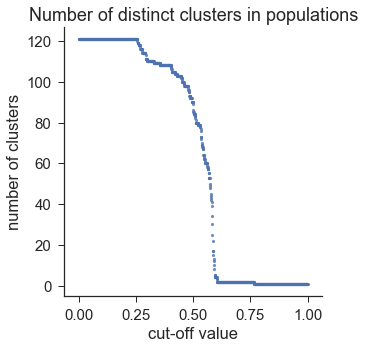

In [191]:
# plot the cut-off vs the number of interconnected clusters
table={'cut-off': cut,
       'number of clusters':ncc_list}
df = pd.DataFrame(table, columns = ['cut-off', 'number of clusters'])

sns.set_context("notebook", font_scale=1.5)
sns.set_style("ticks")
sns.lmplot('cut-off', 'number of clusters', fit_reg=False, data=df, scatter_kws={"marker": "D", "s": 10}) 

plt.title('Number of distinct clusters in populations')
plt.xlabel('cut-off value')
plt.ylabel('number of clusters')

In [225]:
# select cut-off for network analysis
d_cutoff = 0.51
G = nx.Graph()
G.add_nodes_from(n_list)
j = 0
for i in range(n-1):
    for j in range(i+1,n):
        if d[i,j] < d_cutoff:
            G.add_edge(i,j)
Gcc=nx.connected_component_subgraphs(G)
ncc = 0
j=0
for gi in Gcc:
    ncc += 1
    if len(gi.edge.keys()) >= 5:
        j += 1
        print (j)
    for e in gi.edge.keys():
        with open("af.label.txt", "a") as text_file2:
            if len(gi.edge.keys()) < 5:
                print(e, 0, file=text_file2)
            else:
                print(e, j, file=text_file2)
        for e2 in range(len(gi.edge[e])):
             if e < list(gi.edge[e])[e2]:
                with open("af.edge.txt", "a") as text_file:
                    print(e, list(gi.edge[e])[e2], file=text_file)
cut.append(d_cutoff)
ncc_list.append(ncc)
print ("Total group number is",ncc)

1
2
3
Total group number is 82
